# Задание:  

К вам приходит руководитель продукта “Интернет-магазин” и спрашивает про удержание клиентов и повторные покупки.  
У него есть опасение, что из-за проблем с доставкой товаров в магазине у нас стали больше оттекать пользователи.  
Он просит вас сравнить, на сколько сейчас все хуже, чем в прошлом году?  

задачи: 

1) Проверить гипотезу руководителя продукта;  
2) Дать руководителю продукта инструмент для самостоятельного принятия решений по качеству удержания пользовательской базы

In [2]:
#Импорт нужных библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#считываем данные
customers = pd.read_csv('customers.csv')
orders = pd.read_csv('orders.csv')

# Первичный анализ

In [4]:
customers = customers.rename(columns={'id':'customer_id'}) 
customers.head() 

,customer_id,name,segment,state,city
0,CG-12520,Claire Gute,Consumer,Kentucky,Henderson
1,DV-13045,Darrin Van Huff,Corporate,California,Los Angeles
2,SO-20335,Sean O'Donnell,Consumer,Florida,Fort Lauderdale
3,BH-11710,Brosina Hoffman,Consumer,California,Los Angeles
4,AA-10480,Andrew Allen,Consumer,North Carolina,Concord


In [5]:
customers.shape

(793, 5)

In [6]:
customers.describe()

,customer_id,name,segment,state,city
count,793,793,793,793,793
unique,793,793,3,41,252
top,JD-16015,Erica Bern,Consumer,California,New York City
freq,1,1,409,161,68


In [7]:
customers['segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [8]:
orders.head()  

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376


In [9]:
orders.shape

(5009, 5)

In [10]:
orders.describe().sales

count     5009.000000
mean       458.614666
std        954.730953
min          0.556000
25%         37.630000
50%        151.960000
75%        512.064000
max      23661.228000
Name: sales, dtype: float64

In [11]:
orders['ship_mode'].unique()

array(['Standard', 'Second', 'First', 'Same Day'], dtype=object)

In [12]:
orders.customer_id.nunique()

793

In [13]:
orders['order_date'].min()

'2014-01-03'

In [14]:
orders['order_date'].max()

'2017-12-30'

### Промежуточные выводы (1):
Данные корректные, без пропусков. 793 пользователя суммарно совершили 5009 заказа в промежуток с 2014 по 2017 год включительно.

# Анализ: оценка трендов

In [15]:
customers.head()

,customer_id,name,segment,state,city
0,CG-12520,Claire Gute,Consumer,Kentucky,Henderson
1,DV-13045,Darrin Van Huff,Corporate,California,Los Angeles
2,SO-20335,Sean O'Donnell,Consumer,Florida,Fort Lauderdale
3,BH-11710,Brosina Hoffman,Consumer,California,Los Angeles
4,AA-10480,Andrew Allen,Consumer,North Carolina,Concord


In [16]:
df_merge = pd.merge(orders, customers, 'inner', on='customer_id')

In [17]:
df_merge['order_date'] = pd.to_datetime(df_merge['order_date'])
df_merge['order_year']=df_merge['order_date'].dt.year
df_merge['order_month']=df_merge['order_date'].dt.month
df_merge['cohort'] = df_merge.order_date.dt.strftime('%Y-%m')
df_merge.head()

,id,order_date,ship_mode,customer_id,sales,name,segment,state,city,order_year,order_month,cohort
0,100006,2014-09-07,Standard,DK-13375,377.970,Dennis Kane,Consumer,Ohio,Marion,2014,9,2014-09
1,131884,2015-12-06,Same Day,DK-13375,594.002,Dennis Kane,Consumer,Ohio,Marion,2015,12,2015-12
2,145065,2015-12-12,First,DK-13375,32.308,Dennis Kane,Consumer,Ohio,Marion,2015,12,2015-12
3,133046,2017-07-27,Second,DK-13375,297.990,Dennis Kane,Consumer,Ohio,Marion,2017,7,2017-07
4,165099,2017-12-11,First,DK-13375,1.392,Dennis Kane,Consumer,Ohio,Marion,2017,12,2017-12


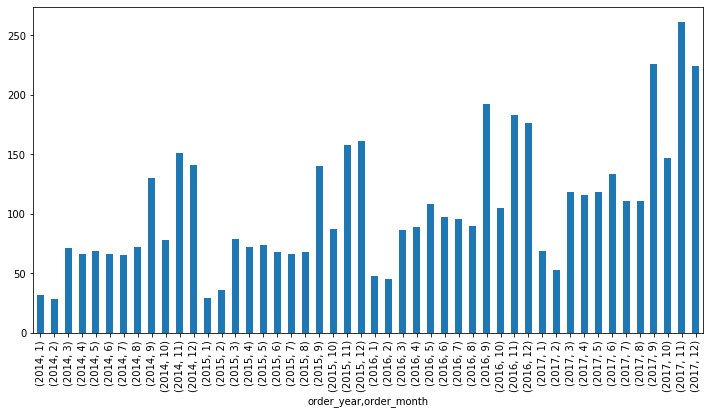

In [18]:
# количество заказов по месяцам
df_merge.groupby(['order_year','order_month']).count()['id'].plot(kind='bar', figsize=(12,6))
plt.show()

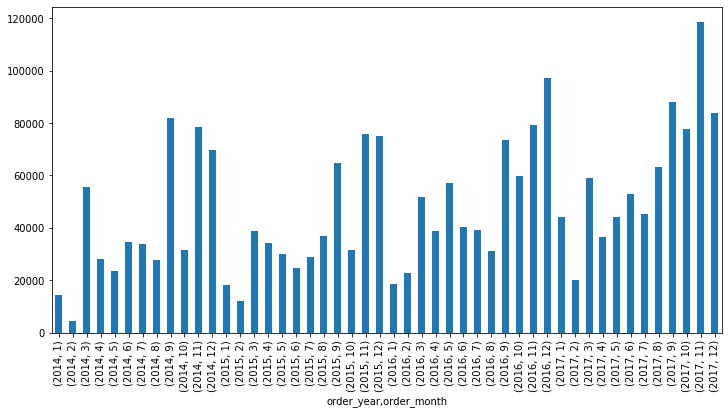

In [19]:
# сумма покупок по месяцам
df_merge.groupby(['order_year','order_month']).sum()['sales'].plot(kind='bar', figsize=(12,6))
plt.show()

### Промежуточные выводы (2):
Мы можем заметить, что количество покупок и сумма этих покупок растет с каждым годом. На ноябрь и декабрь приходятся самые большие объемы.

Теперь можем посмотреть, за счет чего увеличиваются эти показатели: за счет притока новых клиентов, или за счет старых

In [20]:
first_order = df_merge.groupby('customer_id')['order_date'].min().reset_index()
first_order['first_order_year']=first_order['order_date'].dt.year.astype(int)
first_order['first_order_month']=first_order['order_date'].dt.month
first_order['first_order_cohort']=first_order.order_date.dt.strftime('%Y-%m')
first_order.sample(5)

,customer_id,order_date,first_order_year,first_order_month,first_order_cohort
217,DL-12865,2014-06-29,2014,6,2014-06
112,BT-11440,2014-06-04,2014,6,2014-06
68,BD-11500,2014-02-01,2014,2,2014-02
736,TB-21355,2016-01-25,2016,1,2016-01
138,CD-11920,2014-03-24,2014,3,2014-03


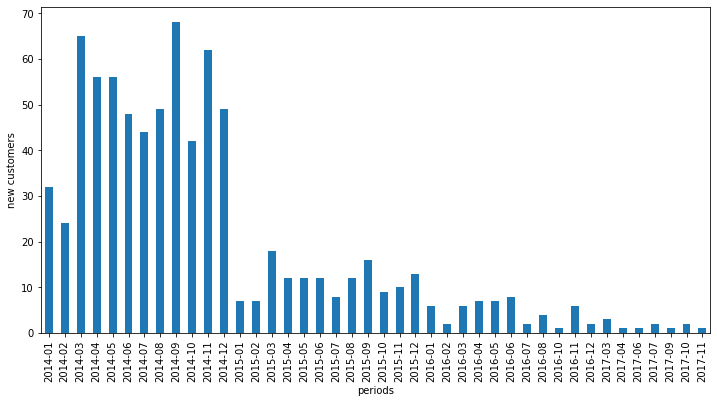

In [21]:
# приток новых покупателей
first_order.groupby('first_order_cohort').count()['customer_id'].plot(kind='bar', figsize=(12,6))
plt.xlabel('periods')
plt.ylabel('new customers')
plt.show()

In [22]:
temp = first_order.groupby(['first_order_cohort', 'first_order_year'])['customer_id'].count().reset_index()

In [23]:
temp2 = temp[temp['first_order_year']>2015]

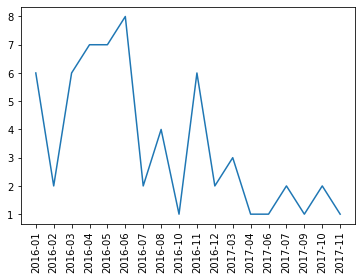

In [24]:
#приток новых покупателей за 2016 и 2017 год
plt.plot(temp2['first_order_cohort'], temp2['customer_id'])
plt.xticks(rotation=90)
plt.show()

In [25]:
temp2['first_order_cohort'].unique()

array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-10', '2016-11', '2016-12', '2017-03',
       '2017-04', '2017-06', '2017-07', '2017-09', '2017-10', '2017-11'],
      dtype=object)

### Промежуточные выводы (3):
Мы видим, что бОльшее количество пользователей пришло в 2014 году, и с каждым годом количество новых пользователей падает. Если отдельно посмотреть только 2016 и 2017 год, то видим тот же низходящий тренд. В 2017 для некоторых месяцев количество новых пользователей равно нулю.

# Анализ: retention

Посмотрим на retention: какое количество покупателей из каждой когорты продалжали совершать покупки в последующих годах.

In [26]:
df_merge_all = pd.merge(df_merge, first_order, 'inner', on='customer_id')
df_merge_all.head(3)

,id,order_date_x,ship_mode,customer_id,sales,name,segment,state,city,order_year,order_month,cohort,order_date_y,first_order_year,first_order_month,first_order_cohort
0,100006,2014-09-07,Standard,DK-13375,377.970,Dennis Kane,Consumer,Ohio,Marion,2014,9,2014-09,2014-09-07,2014,9,2014-09
1,131884,2015-12-06,Same Day,DK-13375,594.002,Dennis Kane,Consumer,Ohio,Marion,2015,12,2015-12,2014-09-07,2014,9,2014-09
2,145065,2015-12-12,First,DK-13375,32.308,Dennis Kane,Consumer,Ohio,Marion,2015,12,2015-12,2014-09-07,2014,9,2014-09


In [27]:
# какое количество покупателей возвращались за покупками в разрезе 2014-2017 гг.
cohorts = df_merge_all.groupby(['first_order_year', 'order_year']).agg({'customer_id': pd.Series.nunique})
cohorts = cohorts.rename(columns={'customer_id':'total_customers'})
cohorts.head(15)

total_customers
first_order_year order_year                 
2014             2014                    595
                 2015                    437
                 2016                    485
                 2017                    517
2015             2015                    136
                 2016                    102
                 2017                    120
2016             2016                     51
                 2017                     45
2017             2017                     11

In [28]:
# сколько заказов и на какую сумму
cohorts2 = df_merge_all.groupby(['first_order_year', 'order_year'])['sales'].agg(['count', 'sum'])
cohorts2.head(15)

count          sum
first_order_year order_year                    
2014             2014          969  484247.4981
                 2015          807  365144.0128
                 2016          996  454908.4041
                 2017         1248  533024.6956
2015             2015          231  105388.4962
                 2016          215   99493.5739
                 2017          293  131772.4962
2016             2016          104   54803.6200
                 2017          127   60906.2584
2017             2017           19    7511.8050

![graph.png](graph.png)

### Промежуточные выводы (4.1):
Основная группа покупателей, пришедшая к нам в 2014 году активно продолжает покупать товары в нашем магазине. 

### Построим тепловую карту:

In [34]:
from itertools import product

cohorts_all = df_merge_all.groupby(['first_order_cohort', 'cohort']).agg({'customer_id': pd.Series.nunique}).reset_index()

all_periods=[]
for i in range(1,49):
    for year in range(2014,2018):
        for month in range(1,13):
            if month<=9:
                month ='0' + str(month)
            all_periods.append(f'{year}-{month}')
            
dff2=pd.DataFrame(sorted(all_periods))
dff4=pd.DataFrame(np.arange(0, 2304))
dff4['first_order_cohort']=dff2
dff4['cohort']=all_periods

mergee=pd.merge(dff4, cohorts_all, 'left', left_on=['first_order_cohort', 'cohort'], right_on=['first_order_cohort', 'cohort'])
mergee['customer_id'] = mergee['customer_id'].fillna(0)
mergee.head(60)

m = mergee.groupby(['first_order_cohort']).agg({'customer_id': 'max'})
m2 = mergee.groupby(['cohort','first_order_cohort']).agg({'customer_id': 'max'})
user_retention = m2['customer_id'].unstack(0).divide(m['customer_id'], axis=0)

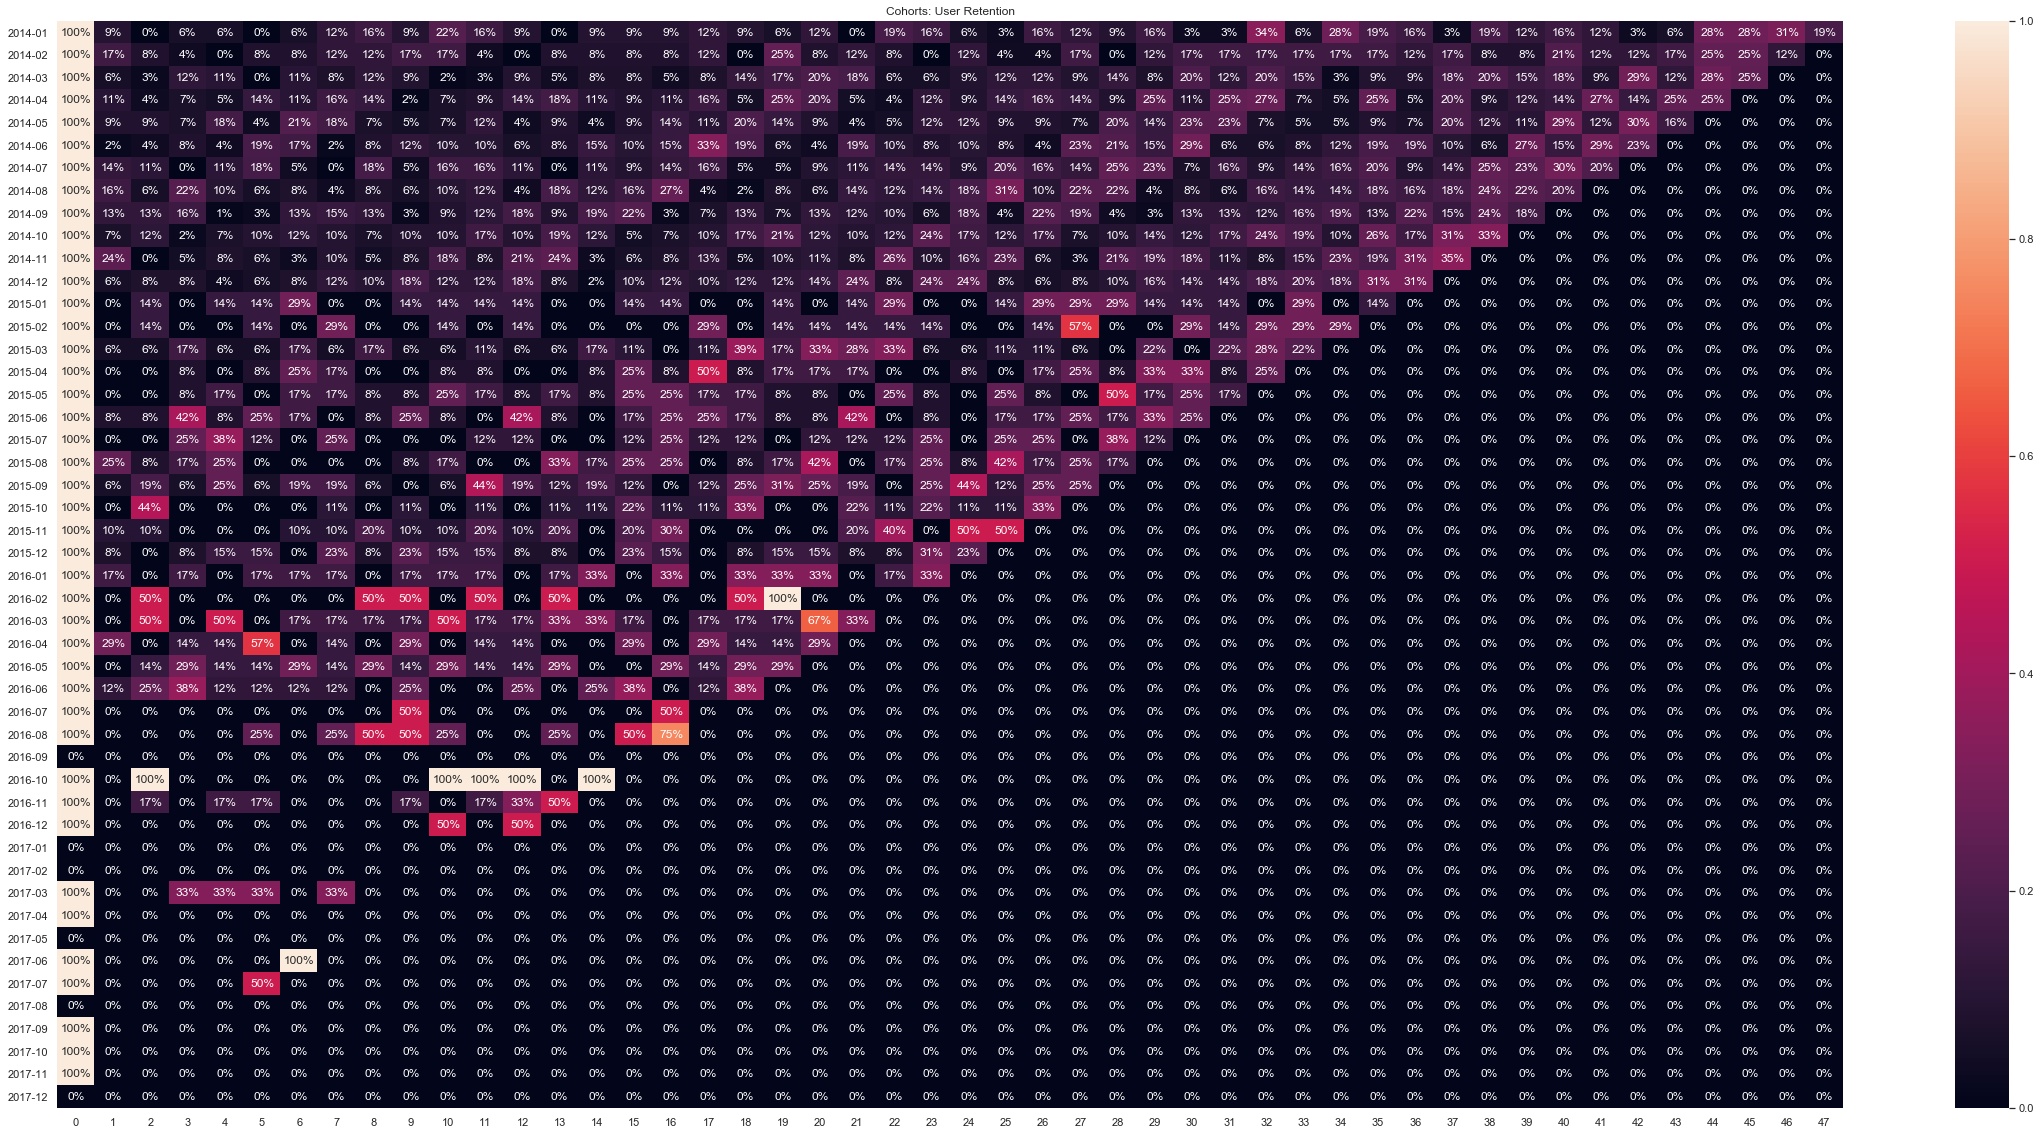

In [35]:
def reshape(a):
    n = len(a)
    arr = []
    for i in range(n):
        arr.append(np.diag(a, i))
    return arr

data_new=pd.DataFrame(reshape(user_retention.values), columns=user_retention.index.values).T.fillna(0)

sns.set(style='white')
plt.figure(figsize=(40, 20))
plt.title('Cohorts: User Retention')
sns.heatmap(data_new, annot=True, fmt='.0%')

### Промежуточные выводы (4.2):
И действительно, мы видим, что "старые" покупатели активно продолжают пользоваться магазином. В некоторые месяцы спрос особенно велик: например, в ноябре и декабре (мы это видим по диагоналям). При этом новых пользователей за 2016 и 2017 почти нет, поэтому данные по этим группам неинформативны.

In [242]:
# когорты по сегментам
cohorts3 = df_merge_all.groupby(['first_order_year', 'order_year', 'segment']).agg({'customer_id': pd.Series.nunique})
cohorts3 = cohorts3.rename(columns={'customer_id':'total_customers'})
cohorts3.head(40)

total_customers
first_order_year order_year segment                     
2014             2014       Consumer                 311
                            Corporate                179
                            Home Office              105
                 2015       Consumer                 231
                            Corporate                126
                            Home Office               80
                 2016       Consumer                 258
                            Corporate                147
                            Home Office               80
                 2017       Consumer                 273
                            Corporate                154
                            Home Office               90
2015             2015       Consumer                  64
                            Corporate                 39
                            Home Office               33
                 2016       Consumer                  46
                            Corporate                 32
                            Home Office               24
                 2017       Consumer                  57
                            Corporate                 35
                            Home Office               28
2016             2016       Consumer                  27
                            Corporate                 15
                            Home Office                9
                 2017       Consumer                  24
                            Corporate                 12
                            Home Office                9
2017             2017       Consumer                   7
                            Corporate                  3
                            Home Office                1

![graph3.png](graph3.png)

### Промежуточные выводы (5):
Сегментирование клиентов не выявило существенных различий в трендах.

# Общие выводы анализа.



1) Увеличение объема и суммы продаж обусловлена высокой активностью старых клиентов,  
совершивших первую покупку в 2014 году; новые клиенты (2016, 2017гг.) почти не влияют на прибыль.  
2) Выявлены существенные проблемы с привлечением новых клиентов;  
3) В сегментах пользоваталей существенных различий в активности не обнаружено;  
4) Нет основания полагать, что отток пользователей увеличится, так как текущий уровень retention обусловлен старыми когортами, которые не изменили свое поведение в 2017 году относительно 2016.  
5) Однако следует иметь в виду, что существующие проблемы с доставкой могут влиять на привлечение новых клиентов в дальнейшем.